[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/student_data.csv')
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


[해석]
- 종속변수는 int형, 독립변수는 objdect, float형으로 이루어져 있음.
- object 타입은 인코딩을 통해 변환해줄 필요가 있음.

In [4]:
df.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


In [5]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

[해석]
- famrel, freetime, goout, Dalc, Walc, health, absences 변수에 결측치가 있음을 확인함.
- 연속형 변수에 결측치가 있으므로 평균 값으로 대체하거나, KNN을 사용할 수 있을 것임.

In [6]:
df.corr()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
famrel,1.000000,0.150423,0.070786,-0.093578,-0.107129,0.100663,-0.048382,0.019283,0.022046,-0.018550
freetime,0.150423,1.000000,0.291859,0.207442,0.145401,0.071042,-0.061367,0.002655,0.007682,-0.013058
goout,0.070786,0.291859,1.000000,0.254985,0.418976,-0.002893,0.041860,-0.151587,-0.146386,-0.157856
Dalc,-0.093578,0.207442,0.254985,1.000000,0.643805,0.059272,0.108628,-0.068208,-0.092063,-0.053369
Walc,-0.107129,0.145401,0.418976,0.643805,1.000000,0.086701,0.135848,-0.090999,-0.128076,-0.084789
health,0.100663,0.071042,-0.002893,0.059272,0.086701,1.000000,-0.031690,-0.071952,-0.070849,-0.094068
absences,-0.048382,-0.061367,0.041860,0.108628,0.135848,-0.031690,1.000000,-0.008305,-0.027168,-0.027400
grade,0.019283,0.002655,-0.151587,-0.068208,-0.090999,-0.071952,-0.008305,1.000000,0.916471,0.964517
G1,0.022046,0.007682,-0.146386,-0.092063,-0.128076,-0.070849,-0.027168,0.916471,1.000000,0.852118
G2,-0.018550,-0.013058,-0.157856,-0.053369,-0.084789,-0.094068,-0.027400,0.964517,0.852118,1.000000


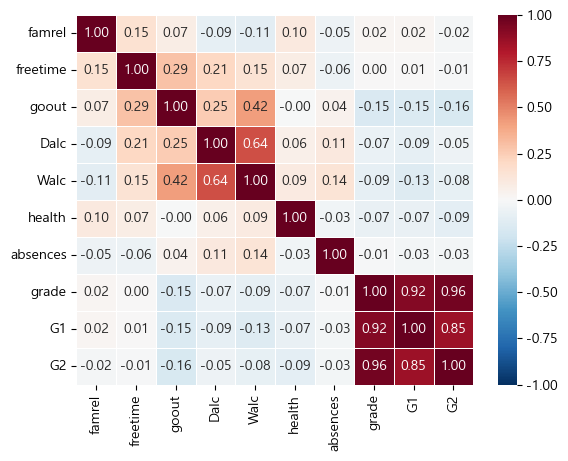

In [7]:
# 상관관계 히트맵
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, fmt='.2f', linewidth=.5, cmap='RdBu_r')
plt.show()

[해석]
- grade와 G1, grade와 G2 간에 강한 양의 상관관계가 존재함.(0.96, 0.92)
- G1, G2 간에 강한 양의 상관관계가 존재함.(0.85) 따라서 다중공선성을 주의할 필요가 있음.
- Walc와 Dalc 간에 양의 상관관계가 존재함.(0.64)
- Walc와 goout 간에 약한 양의 상관관계가 존재함.(0.42)

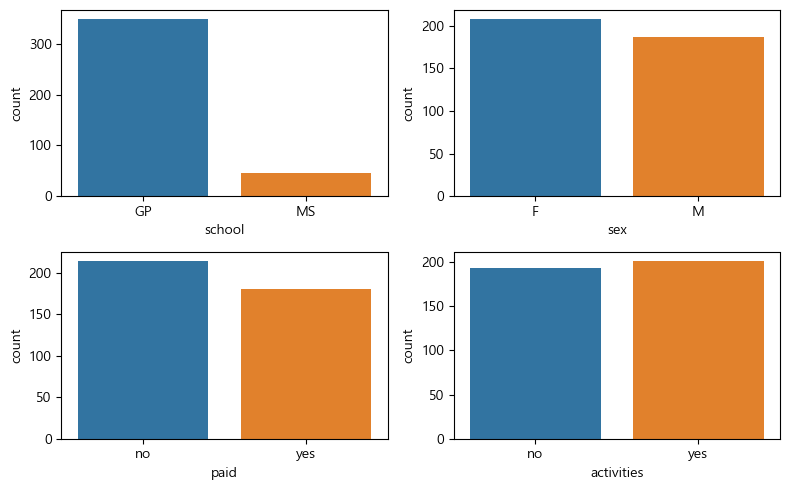

In [8]:
# 범주형 변수 빈도 막대그래프
object_cols = df.select_dtypes(include='object').columns
object_cols

fig, ax = plt.subplots(2,2, figsize=(8, 5))

sns.countplot(x='school', data=df, ax=ax[0][0])
sns.countplot(x='sex', data=df, ax=ax[0][1])
sns.countplot(x='paid', data=df, ax=ax[1][0])
sns.countplot(x='activities', data=df, ax=ax[1][1])

plt.tight_layout()
plt.show()

# for i, col in zip(range(4), object_cols):
#     row = int(i/2)
#     col = i%2
#     sns.countplot(data=df, x=col, ax=ax[row][col])
#     plt.show()

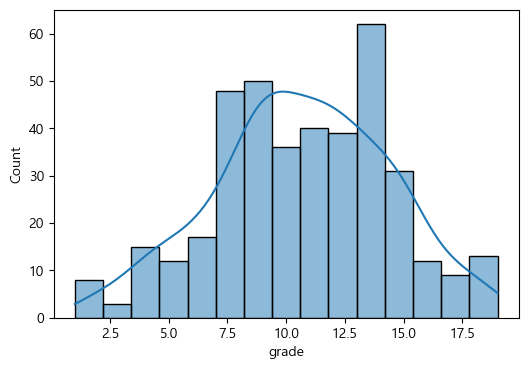

In [9]:
# 학생 성적 히스토그램
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='grade', bins = 15, kde=True)
plt.show()

In [10]:
# 정규성 검정
import scipy.stats as stats
stats.shapiro(df.grade)

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

[해석]
- 학생 성적 분포를 확인한 결과, 정규분포 형태로 보이나, Shapiro test 결과 정규분포를 따른다고 할 수 없음.

### (2) 결측치를 식별, 예측하는 두 가지 방법을 쓰고, 이를 선택한 이유를 설명하시오.

In [11]:
# 결측치 확인1
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [12]:
# 결측치 확인2
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


[해석]
1. 단순대치법: 수치형 변수라면 각 컬럼의 평균값이나 중앙값으로 대체할 수 있고, 범주형 변수라면 최빈값을 활용할 수 있음.
2. KNN을 이용한 결측치 대체: 수치형 변수라면 KNN 알고리즘을 통해 결측치를 대체할 수 있음.
- 해당 데이터에서는 한 행이 전부 결측치인 경우는 없으므로 삭제보다는 다른 값으로 대체하는 것이 좋으며 수치형 변수만 결측치가 있기에 KNN 기법을 사용하여 대체하는 것이 좋음.

[KNN 결측기 보간법](https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=222013171055)

In [3]:
# KNN 결측치 대체
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만 추출
KNN_data = df.drop(columns=['school','sex','paid','activities'])

# 모델링
imputer=KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns) # 결측치 대체값을 데이터프레임으로 변환
df[KNN_data.columns] = df_filled # 결측치 대체값을 df에 삽입

# 결측치 확인
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

### (3) 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.

In [4]:
df = pd.get_dummies(df, columns=['school','sex','paid','activities'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


In [5]:
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,1,1,0,0


[해석]
- 범주형 변수로 판단한 'school','sex','paid','activities' 컬럼을 더미 변수로 변환하였음.

### (4) 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오.

[해석]
1. 랜덤 분할: train, test 데이터를 나누어 학습된 데이터를 검증할 수 있으며, 분할 시에 각 비율을 지정할 수 있음.
1. 층화 추출 기법: 종속변수가 범주형 변수인 경우에는 종속변수의 클래스 비율을 기준으로 train, test 데이터의 비율을 동일하게 분할함.

- 해당 데이터는 종속변수가 연속형이므로 층화 추출 기법이 아닌 랜덤 분할 방식을 사용함.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['grade'], axis=1)
y = df.grade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2022)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 13)
(119, 13)
(276,)
(119,)


### (5) svm, xgboost, randomforest 3개의 알고리즘의 공통점을 쓰고, 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

[공통점]
1. 회귀분석과 분류분석을 모두 할 수 있음.
1. 범주형 변수를 독립변수로 사용할 수 없어 변환을 해야함.
1. 과대적합과 과소적합을 피하기 위한 매개변수 설정이 필요함.
1. 회귀분석에서 다중공선성의 문제를 해결할 수 있음.

- 해당 데이터는 회귀분석이 적합하고, 회귀분석은 다중공선성 문제를 해결하는 것이 중요한데, svm은 커널트릭을 통해, xgboost, randomforest는 트리모델을 통해 다중공선성을 해결할 수 있음. 따라서 회귀분석을 지원하는 위 3가지 알고리즘은 연속형 변수를 예측하기에 적합함.

### (6) 세 가지 모델 모두 모델링해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [7]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
# svm
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [.1, 1, 10, 100],
     'gamma': [.001, .01, .1, 1, 10]}
]
grid_svm= GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
result = pd.DataFrame(grid_svm.cv_results_['params']) # cv_results_ 교차 검증 결과를 담고 있는 딕셔너리
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
15,100.0,0.001,0.960941
11,10.0,0.010,0.957198
16,100.0,0.010,0.947652
10,10.0,0.001,0.941800
6,1.0,0.010,0.921494
12,10.0,0.100,0.861286
17,100.0,0.100,0.857767
7,1.0,0.100,0.785883
5,1.0,0.001,0.303419
2,0.1,0.100,0.283644


In [15]:
# best_model = grid_svm.best_estimator_ # SVR(C=100, gamma=0.001)
grid_svm.fit(X_train_scaled, y_train) # SVR(C=100, gamma=0.001)

print('R2:', grid_svm.score(X_test_scaled, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, grid_svm.predict(X_test_scaled))))

R2: 0.9574163452579298
RMSE: 0.7753004545895938


In [17]:
# randomforest
rf_grid = [
    {'max_depth': [2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10]}
]
rf = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train_scaled, y_train)

print(rf.best_estimator_)
print('R2:', rf.score(X_test_scaled, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test_scaled))))

RandomForestRegressor(max_depth=10, min_samples_split=4)
R2: 0.9555456017643704
RMSE: 0.7921472894018965


In [20]:
# xgboost
xgb_grid = [
    { 'max_depth': [2,4,6,8,10]}
]

xgb = GridSearchCV(XGBRegressor(n_estimators=1000), param_grid =xgb_grid, cv = 5)
xgb.fit(X_train, y_train)

print("R2 : ", xgb.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

R2 :  0.963211004628444
RMSE: 0.7206220334000073


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

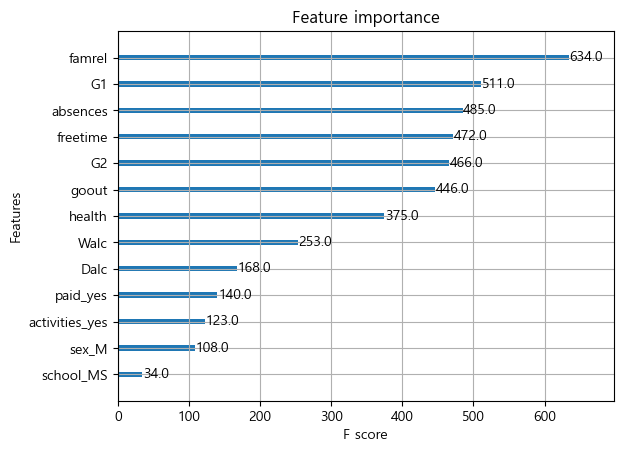

In [27]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_)

[해석]
- XGBoost 모델이 가장 정확도가 높고, RMSE 값이 낮으므로 분석력이 가장 좋아 적합한 알고리즘이라고 할 수 있음.
- 변수 중요도를 파악한 결과, 가족친밀도인 farmrel 변수가 최종 성적에 영향을 많이 줌.
- G1, G2를 주 변수로 사용할 수 있지만 이 또한 성적이기에 분석을 통해 성적에 영향을 미치는 변수를 찾기는 어려움,
- 머신러닝은 어떤 독립변수를 선택하느냐에 따라 결과 해석이 완전히 달라질 수 있기에, 학생의 성적에 영향을 미치는 변수를 찾고 싶으면 성적과 밀접한 관련이 있는 변수를 추가해야 함.

## 통계분석
### 1. 회귀분석
### (1) 데이터를 8:2로 분할하고 선형 회귀를 적용하시오. 결정계수와 rmse를 구하시오.

In [3]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

X, y = mglearn.datasets.load_extended_boston()

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 104)
(102, 104)
(404,)
(102,)


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print('선형 회귀 R2 Score:', r2_score(y_test, pred))
print('선형 회귀 RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

선형 회귀 R2 Score: 0.6158858584078898
선형 회귀 RMSE: 5.592657237078534


[해석]
- 선형 회귀의 성능평가 결과, R2 score는 약 61.5%, RMSE는 약 5.59로 나타났음.

### (2) 데이터 8:2로 분할하고 릿지 회귀 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha=np.arange(0, 1.1, 0.1)
ridge_params=[{'alpha': alpha}]
ridge_grid = GridSearchCV(Ridge(), cv=5, param_grid=ridge_params)
ridge_grid.fit(X_train, y_train)

print(ridge_grid.best_estimator_)
print('Ridge 회귀:', ridge_grid.score(X_test, y_test))
print('Ridge R2 Score:', np.sqrt(mean_squared_error(y_test, ridge_grid.predict(X_test))))

Ridge(alpha=0.1)
Ridge 회귀: 0.746382410891929
Ridge R2 Score: 4.544412437236783


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73285e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[해석]
- 결정계수가 가장 높을 때의 알파 값은 0.1로 나타남.
- Ridge 회귀의 결정계수는 약 74.6%이고, RMSE는 약 4.54로 나타남.

### (3) 데이터 8:2로 분할하고 라쏘 회귀 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha=np.arange(0, 1.1, 0.1)
param = [{'alpha': alpha}]
lasso_grid = GridSearchCV(Lasso(), param_grid=param, cv=5)
lasso_grid.fit(X_train, y_train)

print(lasso_grid.best_estimator_)
print('Lasso 회귀:', lasso_grid.score(X_test, y_test))
print('Lasso R2 Score:', np.sqrt(mean_squared_error(y_test, lasso_grid.predict(X_test))))

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+02, tolerance: 2.838e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers imple

Lasso(alpha=0.0)
Lasso 회귀: 0.690188038527979
Lasso R2 Score: 5.022698918447325


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[해석]
- 결정계수가 가장 높을 때의 알파 값은 0으로 나타남.
- Lasso 회귀의 결정계수는 약 69.0%이고, RMSE는 약 5.02로 나타남.

### 2. 다항 회귀분석 시각화
### 단순 선형 회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오.

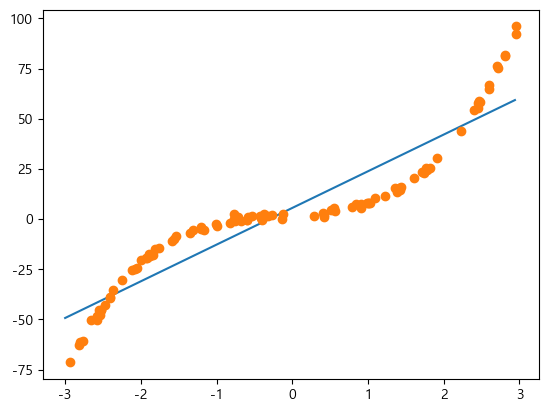

In [52]:
# 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

# 그래프 그리기
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line))
plt.plot(X[:,0], y, 'o')

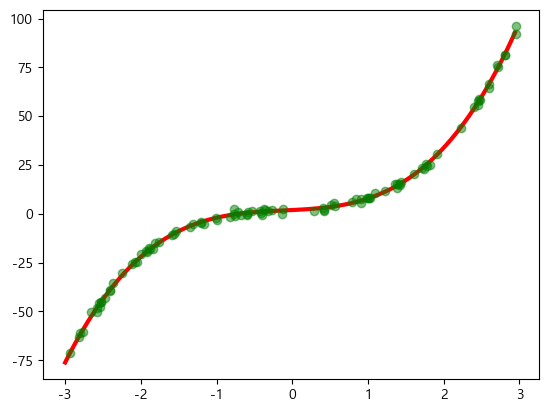

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# x**3 까지 3차항을 적용시켜야 함 
poly = PolynomialFeatures(degree=3, include_bias=False) # include_bias=False: 상수항을 설정하지 않음.
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly, y)

plt.plot(line, reg.predict(line_poly), c='r',linewidth=3)
plt.plot(X,y,'o',c = 'g', alpha=0.5)

### 3. ANOVA 분석
### 변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수) 이원분산분석을 수행하고 통계표를 작성하시오.

[가설]
- 주효과 검정1
    - type에 따른 AveragePrcie의 차이는 없다.
    - type에 따른 AveragePrcie의 차이가 있다.
- 주효과 검정2
    - region에 따른 AveragePrcie의 차이는 없다.
    - region에 따른 AveragePrcie의 차이가 있다.
- 교호작용 검정
    - region, type 간에 상호작용 효과가 없다.
    - region, type 간에 상호작용 효과가 있다.

In [62]:
import pandas as pd
import numpy as np
avocado = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston' )| (avocado['region']=='Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [72]:
print(avocado.type.unique())
print(avocado.region.unique())

['conventional' 'organic']
['Boston' 'Chicago' 'Orlando']


In [65]:
# 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


[결과]
- 분산분석 결과, 주효과 검정1, 2, 교호작용 검정 모두 p-value 값이 0.05보다 작으므로 통계적으로 유의하다고 할 수 있기에, 귀무가설을 기각할 수 있다.

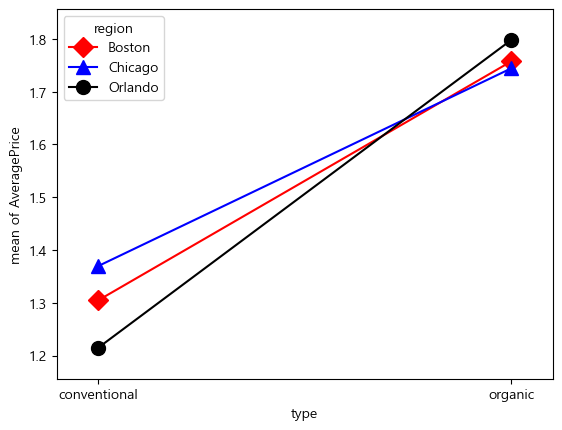

In [78]:
from statsmodels.graphics.factorplots import interaction_plot

# 독립변수와 종속변수를 Series 형태로 변경
Type = avocado['type']
region = avocado['region']
averageprice = avocado['AveragePrice']
fig, ax = plt.subplots()
fig = interaction_plot(Type, region, averageprice, colors=['red','blue', 'black'], markers=['D', '^', 'o'], ms=10, ax=ax)

[해석]
- orlando에서는 다른 지역보다 conventional 대비 organic의 선호도가 높음을 알 수 있음.